In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [14, 8]
np.random.seed(42)

### Read google-trends data

Specify a filename with google searches according to your variant.

In [6]:
# TODO: Your code here
file_name = f"multiTimeline{13108665 % 7}.csv"

data_path = os.path.join("data", file_name)

Read csv file.

In [7]:
df = pd.read_csv(data_path, skiprows=[0, 1], index_col=0)

df.columns = ["Searches"]
df.index.name = "Week"
df.head()

,Searches
Week,
2015-08-23,33
2015-08-30,32
2015-09-06,33
2015-09-13,27
2015-09-20,25


<AxesSubplot:xlabel='Week'>

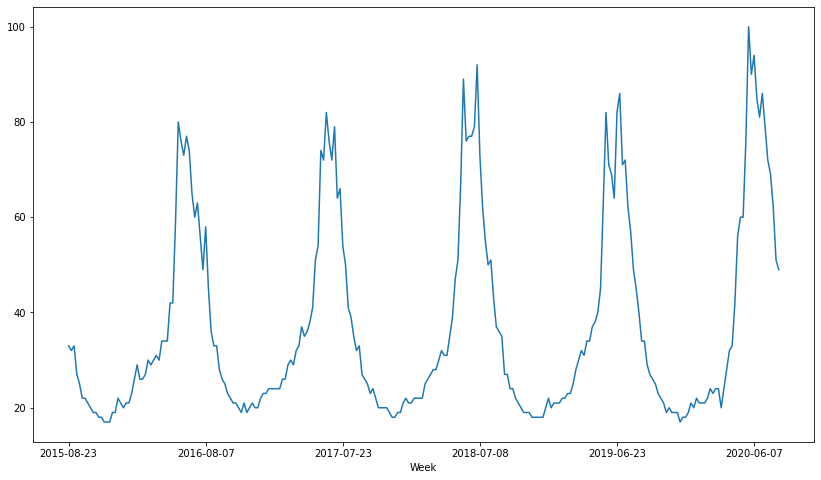

In [8]:
df["Searches"].plot()

### Define demand function

In [9]:
prime_cost = 100
min_price, max_price = prime_cost, prime_cost * 6

Uniformly generate prices.

In [10]:
df["Price"] = np.random.uniform(min_price, max_price, df.shape[0])
df.head()

,Searches,Price
Week,,
2015-08-23,33,287.270059
2015-08-30,32,575.357153
2015-09-06,33,465.996971
2015-09-13,27,399.329242
2015-09-20,25,178.009320


Linear demand function.

In [11]:
k0, k1 = 108, -0.18

In [12]:
def demand(price):
    return k0 + k1 * price

Visualize demand function.

Text(0, 0.5, 'Demand')

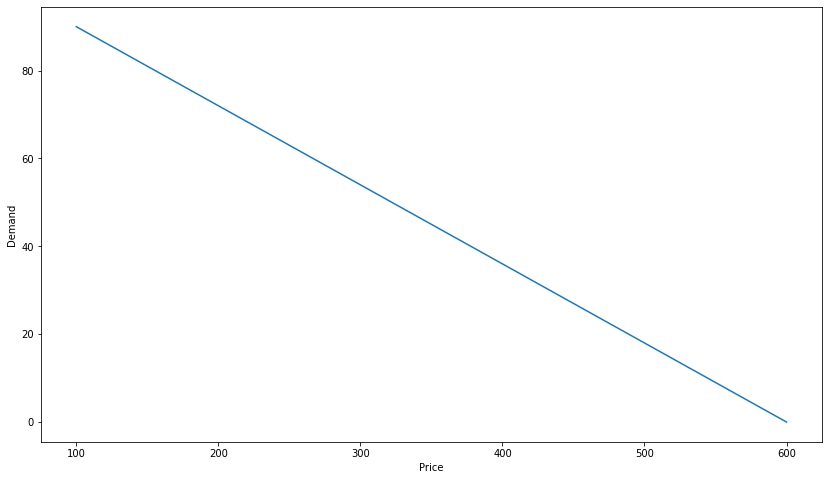

In [13]:
x = np.linspace(min_price, max_price, 100)
y = demand(x)

plt.plot(x, y)
plt.xlabel("Price")
plt.ylabel("Demand")

### Generate Sales

Generate sales.

In [14]:
df["Price Component"] = df["Price"].apply(demand)

In [17]:
std = 2
sales_coef = df["Price Component"].std() / df["Searches"].std() / 1.5

df["Sales"] = sales_coef * df["Searches"] + df["Price Component"] + std * np.random.randn(df.shape[0])

<AxesSubplot:xlabel='Week'>

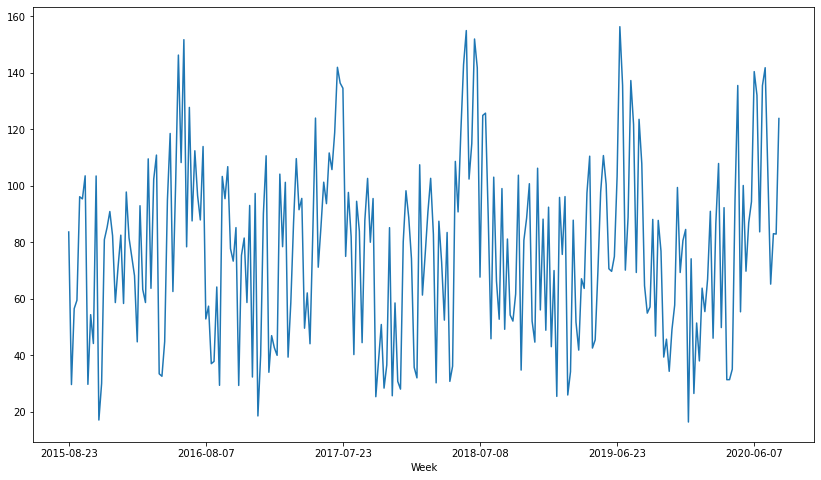

In [18]:
df["Sales"].plot()

Plot data points.

Text(0, 0.5, 'Sales')

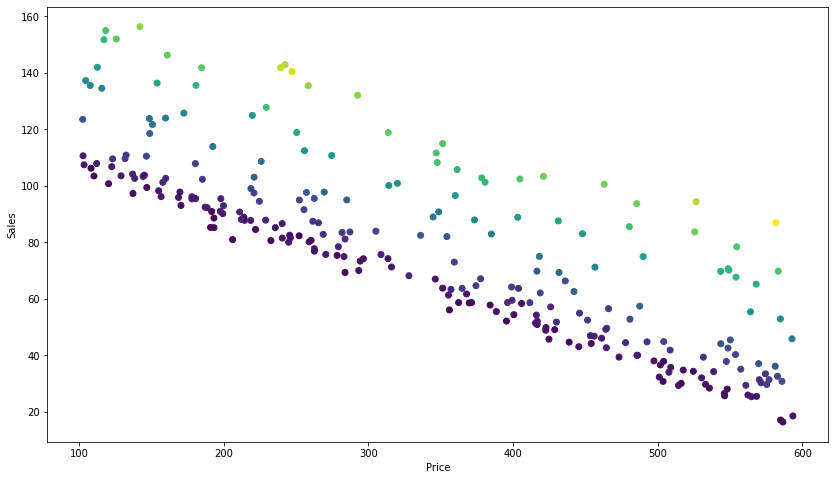

In [19]:
plt.scatter(df["Price"], df["Sales"], c=df["Searches"])
plt.xlabel("Price")
plt.ylabel("Sales")

### Save Data


In [20]:
output_path = os.path.join("data", "sales_data.csv")
df.drop("Searches", axis=1, inplace=True)
df.to_csv(output_path)